<a href="https://colab.research.google.com/github/MaeSantos/CCMACLRL_EXERCISES_COM232ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)
testdata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
sample_submission_data = pd.read_csv(sample_submission_url)
sample_submission_data.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

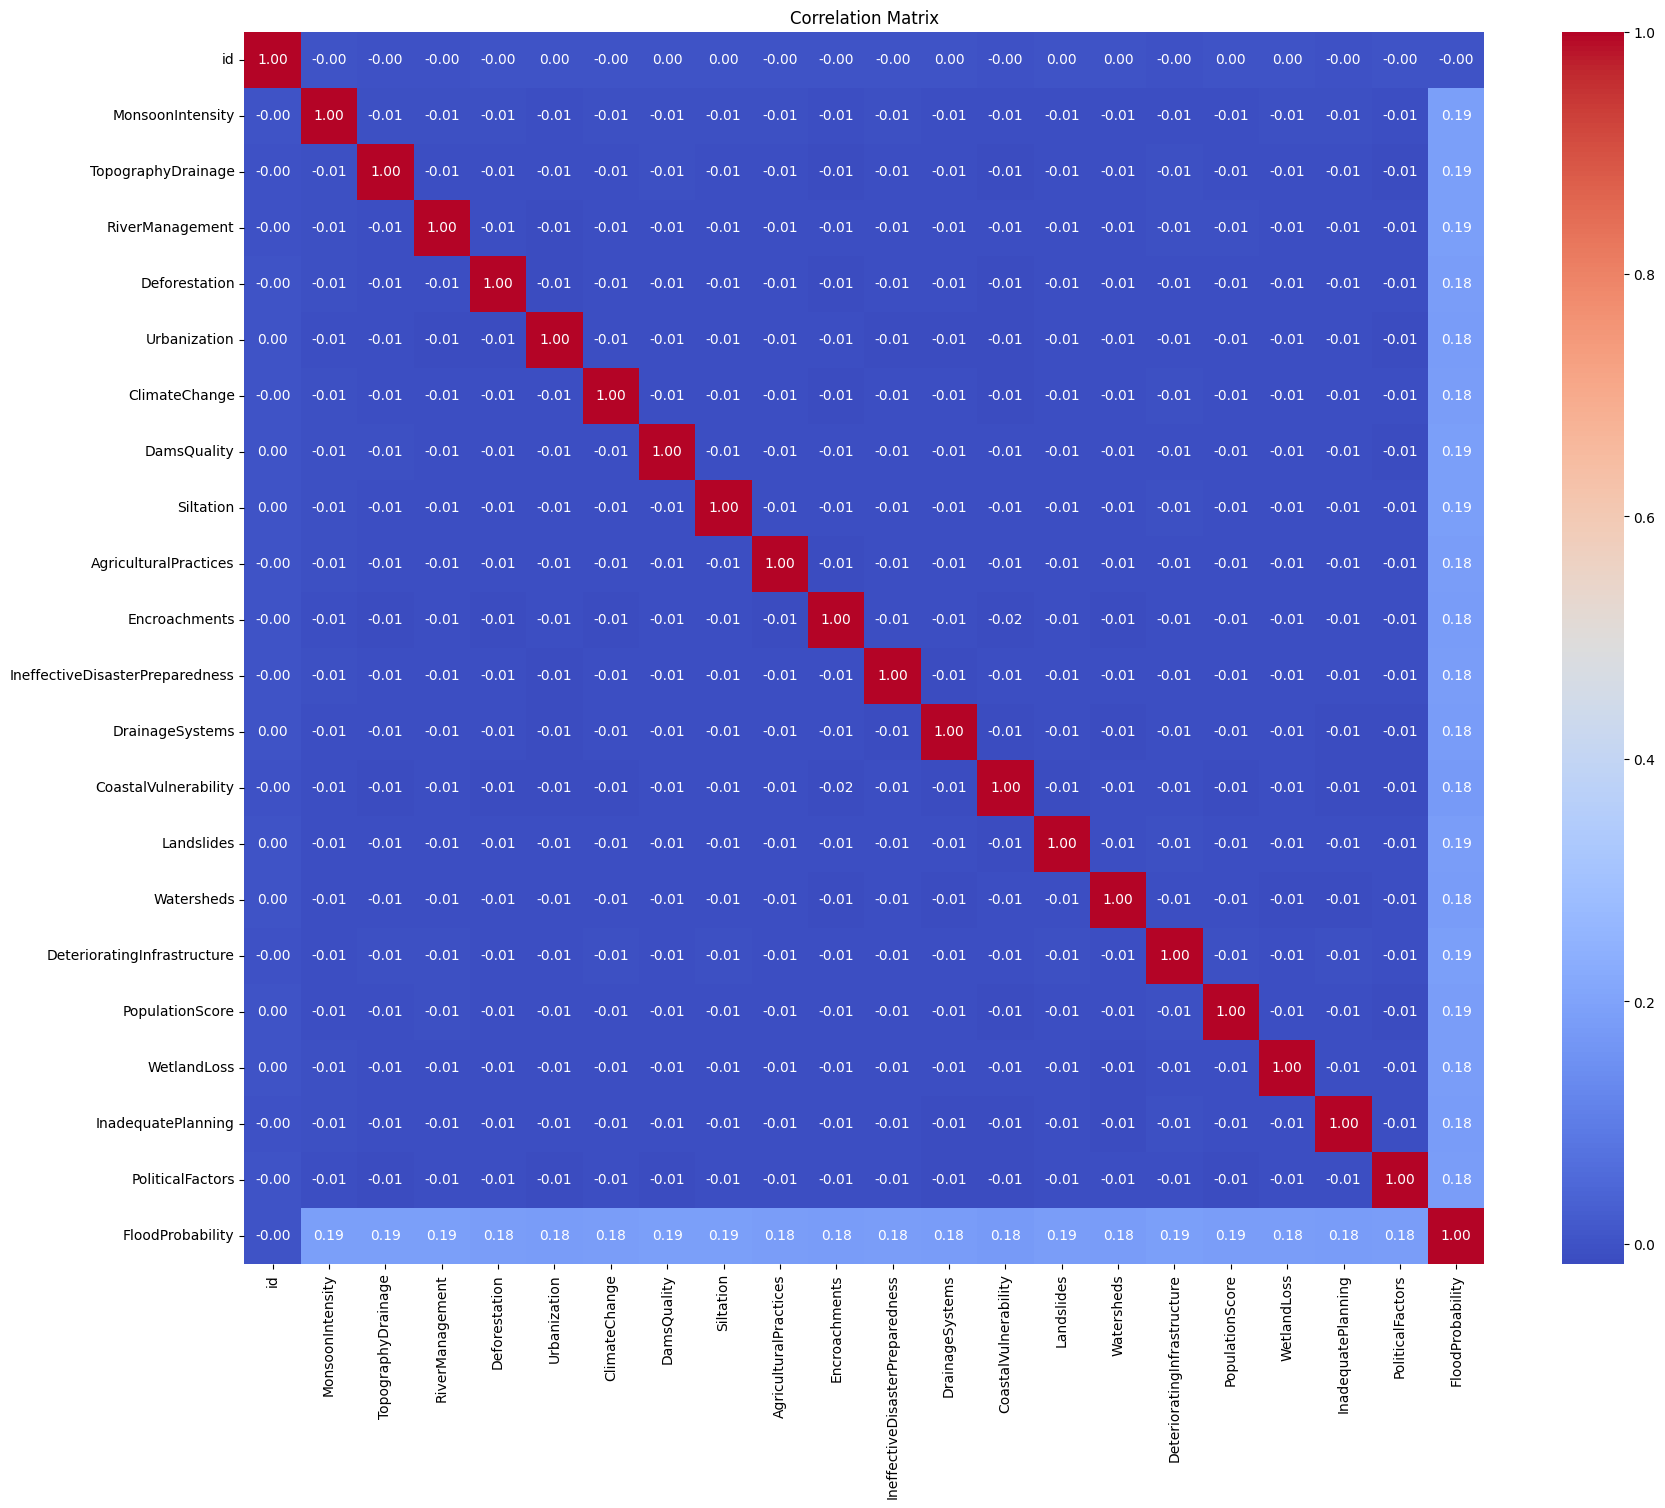

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(traindata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
features = [col for col in traindata.columns if col not in ['id', 'FloodProbability']]
X = traindata[features]
y = traindata['FloodProbability']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into training and validation sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
model = LinearRegression()
model.fit(X_train, y_train)


Data split into training and validation sets.
X_train shape: (894365, 20)
X_val shape: (223592, 20)


LinearRegression()

In [ ]:
y_pred_val = model.predict(X_val)
r2 = r2_score(y_val, y_pred_val)
print(f"{r2:.4f}")

0.8449


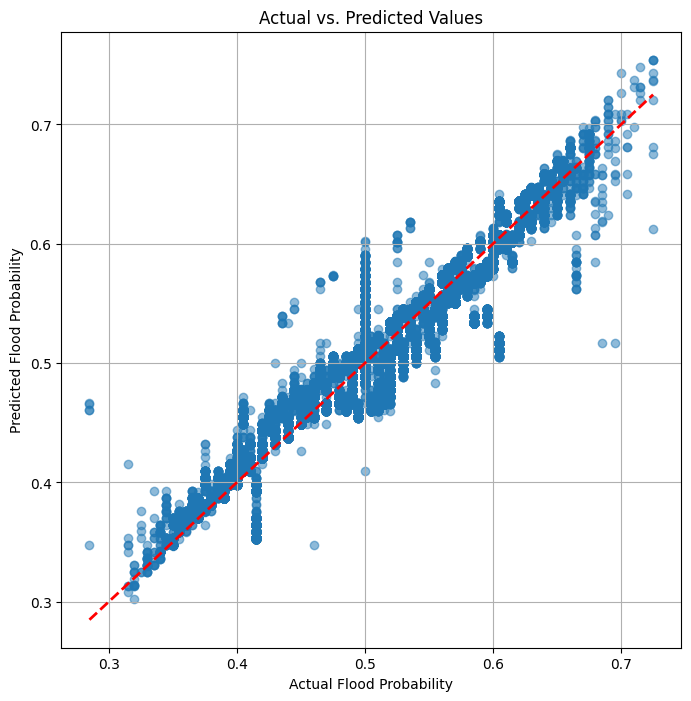

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.grid(True)
plt.show()

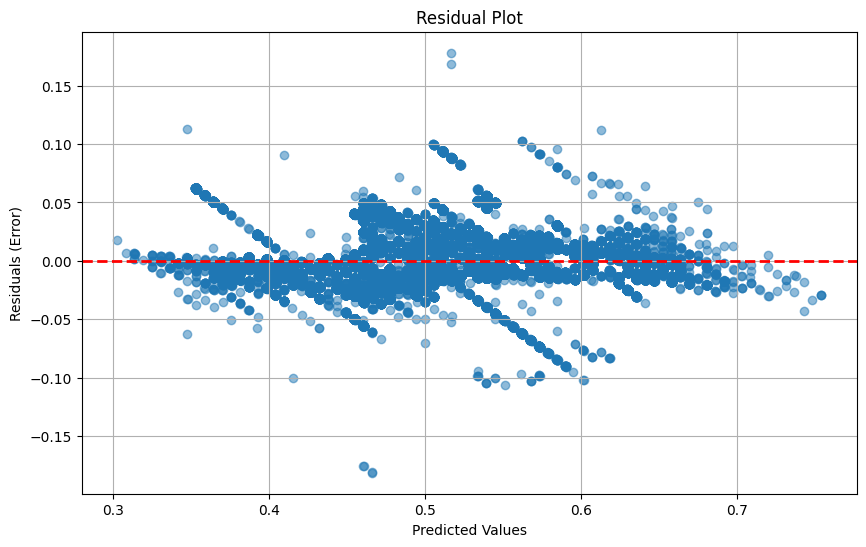

In [ ]:
residuals = y_val - y_pred_val
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()

In [ ]:
X_test = testdata[features]
final_predictions = model.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({
    'id': testdata['id'],
    'FloodProbability': final_predictions
})

In [ ]:
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' has been created.")
submission_df.head()


Submission file 'submission.csv' has been created.


,id,FloodProbability
0,1117957,0.573613
1,1117958,0.455271
2,1117959,0.454752
3,1117960,0.466179
4,1117961,0.466085
